In [1]:
import pandas as pd
import numpy as np
import openpyxl
data=pd.read_excel('./DB_0531_1740(태환).xlsx')
data1=pd.read_excel('./DB_0531_1740(태환).xlsx')
# data.columns
       # '유동비율',
       # '당좌비율', '부채비율', '차입금의존도', '이자보상배율(역수)', '매출총이익률', '영업이익률', '당기순이익률',
       # 'ROA', 'ROE', '재고자산회전율', '매출채권회전율', '총자산회전율', '매입채무회전율', '현금순환주기',
       # '매출액증가율', '영업이익증가율', '유형자산증가율', '총자산증가율', '교육훈련비/영업이익', '경상개발비/영업이익',
       # '복리후생비/영업이익', '기부금/영업이익', '비정규직비율', '여성고용률', '공공조달은1', 'new_시총',
       # 'new_평균근속연수', 'new_기업존속연수', 'new_상장년수', '자산/기말인원'

```
pandas.DataFrame.plot
DataFrame.plot(*args, **kwargs)[source]
Make plots of Series or DataFrame.
```

In [2]:
dff = pd.DataFrame(data.groupby(["회계년도",'K1_Score_ad']).size()).reset_index() 
dff.columns =['회계년도','K1_Score_ad','count']  
dff

,회계년도,K1_Score_ad,count
0,2017,건전,671
1,2017,부실,56
2,2017,판정보류,36
3,2018,건전,660
4,2018,부실,72
5,2018,판정보류,31
6,2019,건전,645
7,2019,부실,69
8,2019,판정보류,49
9,2020,건전,632


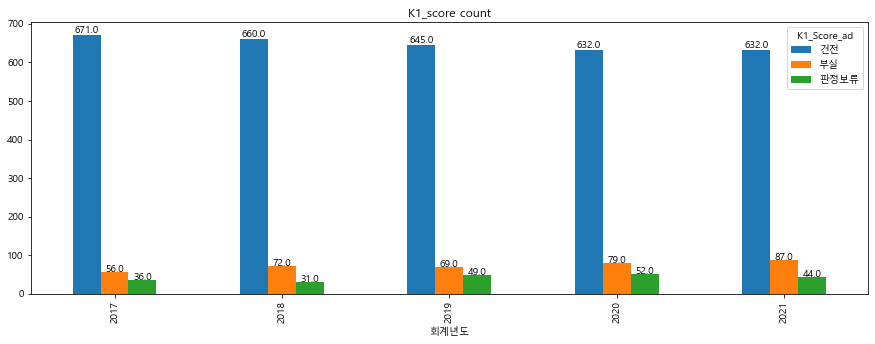

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'
ax = pd.pivot_table(dff, index = '회계년도', columns='K1_Score_ad', values='count').plot(subplots=False, title = "K1_score count", kind='bar', figsize = (15,5))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate(height, (left+width/2, height*1.01), ha='center')
plt.show()

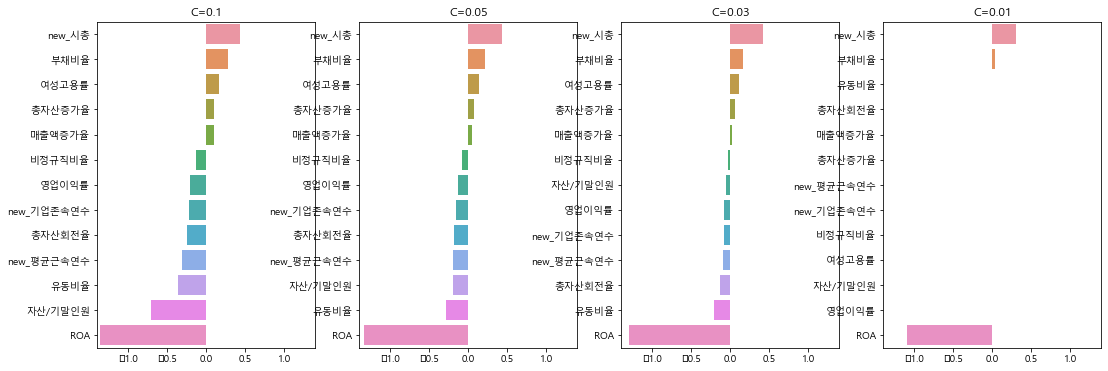

new_시총        0.422701
부채비율          0.167312
여성고용률         0.117814
총자산증가율        0.064107
매출액증가율        0.021515
비정규직비율       -0.034285
자산/기말인원      -0.056414
영업이익률        -0.074527
new_기업존속연수   -0.077219
new_평균근속연수   -0.091843
총자산회전율       -0.126583
유동비율         -0.211195
ROA          -1.300430
dtype: float64


In [2]:
#     '유동비율', '부채비율',  'new_시총', '영업이익률', 'ROE','ROA',
#    '총자산회전율',  '매출액증가율',  '총자산증가율','new_평균근속연수'
#     ,'new_기업존속연수', '비정규직비율', '여성고용률', '자산/기말인원'
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
# data.fillna(0, inplace=True)
column_list=[
    '유동비율', '부채비율',  'new_시총', '영업이익률', 'ROA',
   '총자산회전율',  '매출액증가율',  '총자산증가율','new_평균근속연수'
    ,'new_기업존속연수', '비정규직비율', '여성고용률', '자산/기말인원'
    ]
x = data[column_list]
y = data['K1_Score_ad']
y = y.apply(lambda x: 1 if(x=='부실' or x=='판정보류') else 0)
data['K1_Score_ad']=y
st = StandardScaler()
x= st.fit_transform(x)
x=pd.DataFrame(x, columns=column_list)

plt.rcParams['font.family'] =  'Malgun Gothic'
alphas = [0.1,0.05 ,0.03,0.01 ]
# fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=4)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성 
coeff_df = pd.DataFrame()
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=4)
for pos , alpha in enumerate(alphas):
    lasso =LogisticRegression(solver='liblinear',penalty='l1',C=alpha) 
    model=lasso.fit(x , y)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
    coeff = pd.Series(data=model.coef_[0], index=x.columns )
    colname='C='+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1.4,1.4)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()
coeff_df = pd.DataFrame()
lasso = LogisticRegression(solver='liblinear',penalty='l1',C=0.03) 
model=lasso.fit(x , y)
coeff = pd.Series(data=model.coef_[0] , index=x.columns )
#coeff2=abs(coeff)
coeff = coeff.sort_values(ascending=False)
print(coeff)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = x.corr()   # 상관관계 리턴
corr

,유동비율,부채비율,new_시총,영업이익률,ROA,총자산회전율,매출액증가율,총자산증가율,new_평균근속연수,new_기업존속연수,비정규직비율,여성고용률,자산/기말인원
유동비율,1.000000,-0.324693,0.065271,-0.028795,0.072691,-0.216329,-0.035989,-0.015641,0.019370,-0.046923,-0.078307,0.114663,-0.019256
부채비율,-0.324693,1.000000,0.042766,-0.007940,-0.184287,0.143925,0.040028,0.053699,0.023856,0.021417,0.027621,-0.095420,0.244598
new_시총,0.065271,0.042766,1.000000,-0.214820,-0.203717,-0.129666,0.112604,0.085161,-0.029826,-0.119756,-0.033773,0.171283,-0.060612
영업이익률,-0.028795,-0.007940,-0.214820,1.000000,0.296027,0.143520,0.048201,0.034514,0.025931,0.043279,0.044414,-0.119656,0.008526
ROA,0.072691,-0.184287,-0.203717,0.296027,1.000000,0.200455,0.096393,0.178694,0.032382,0.051918,0.079876,-0.090529,0.017615
총자산회전율,-0.216329,0.143925,-0.129666,0.143520,0.200455,1.000000,0.111961,0.002405,-0.000803,0.061230,0.117161,-0.124036,-0.030943
매출액증가율,-0.035989,0.040028,0.112604,0.048201,0.096393,0.111961,1.000000,0.303098,0.011373,-0.057283,0.005637,0.009822,0.031148
총자산증가율,-0.015641,0.053699,0.085161,0.034514,0.178694,0.002405,0.303098,1.000000,-0.015357,-0.057300,0.010573,0.031398,0.046714
new_평균근속연수,0.019370,0.023856,-0.029826,0.025931,0.032382,-0.000803,0.011373,-0.015357,1.000000,-0.417076,-0.083364,-0.157793,-0.049960
new_기업존속연수,-0.046923,0.021417,-0.119756,0.043279,0.051918,0.061230,-0.057283,-0.057300,-0.417076,1.000000,0.048189,-0.075559,0.018565


<AxesSubplot:>

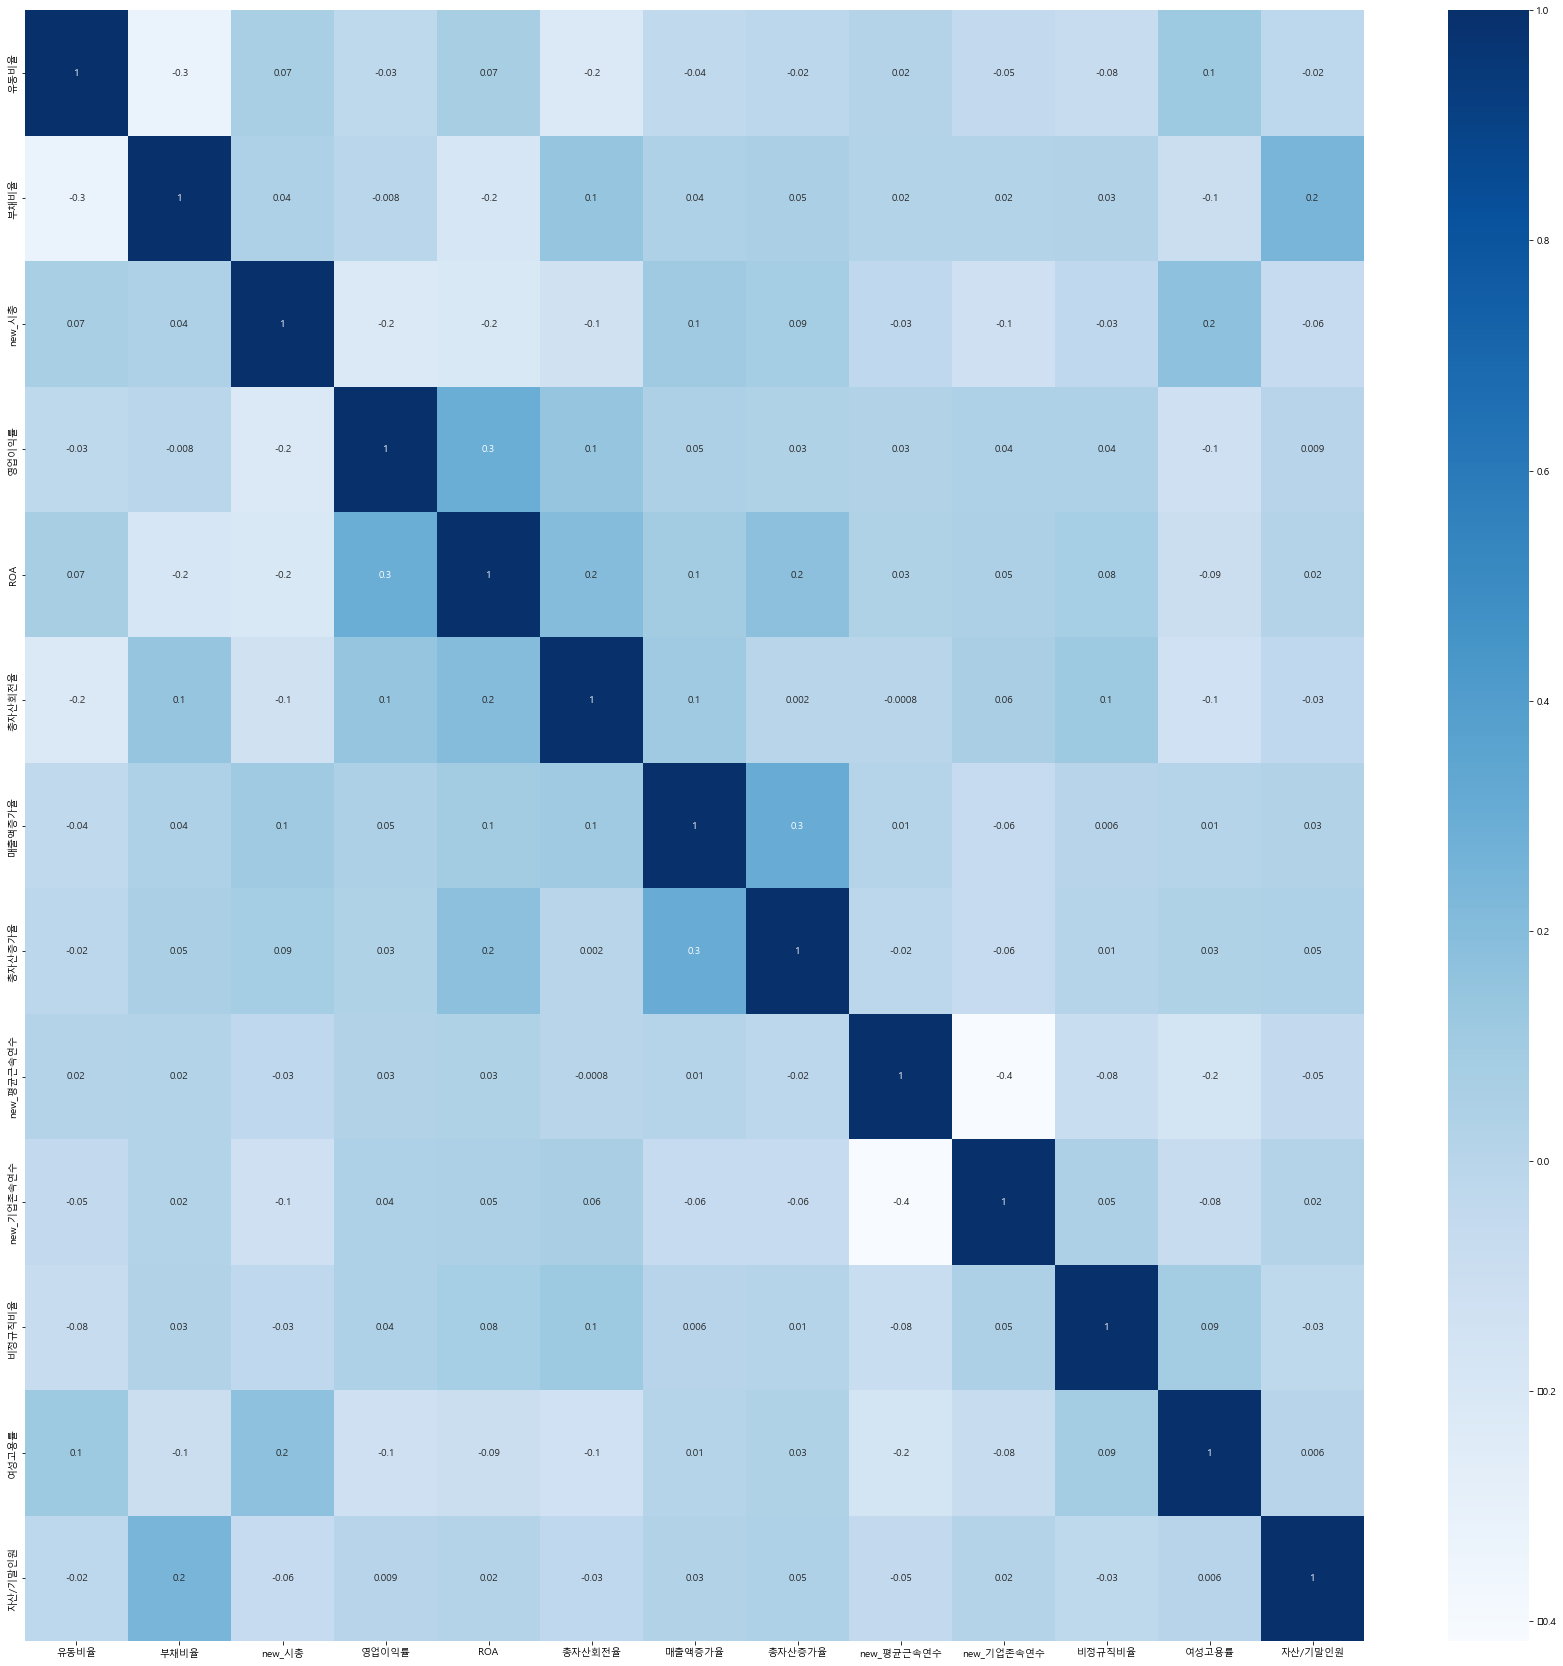

In [9]:
fig = plt.figure( figsize = (30,30))
sns.heatmap(corr,annot=True,fmt='.1g',cmap='Blues') 

In [10]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
print(vif)

    VIF Factor    features
0     1.043772      비정규직비율
1     1.094175     자산/기말인원
2     1.122171       여성고용률
3     1.136847      매출액증가율
4     1.141735       영업이익률
5     1.156192      new_시총
6     1.157630      총자산증가율
7     1.169295      총자산회전율
8     1.181702        유동비율
9     1.272470  new_기업존속연수
10    1.285194  new_평균근속연수
11    1.286272        부채비율
12    1.288233         ROA


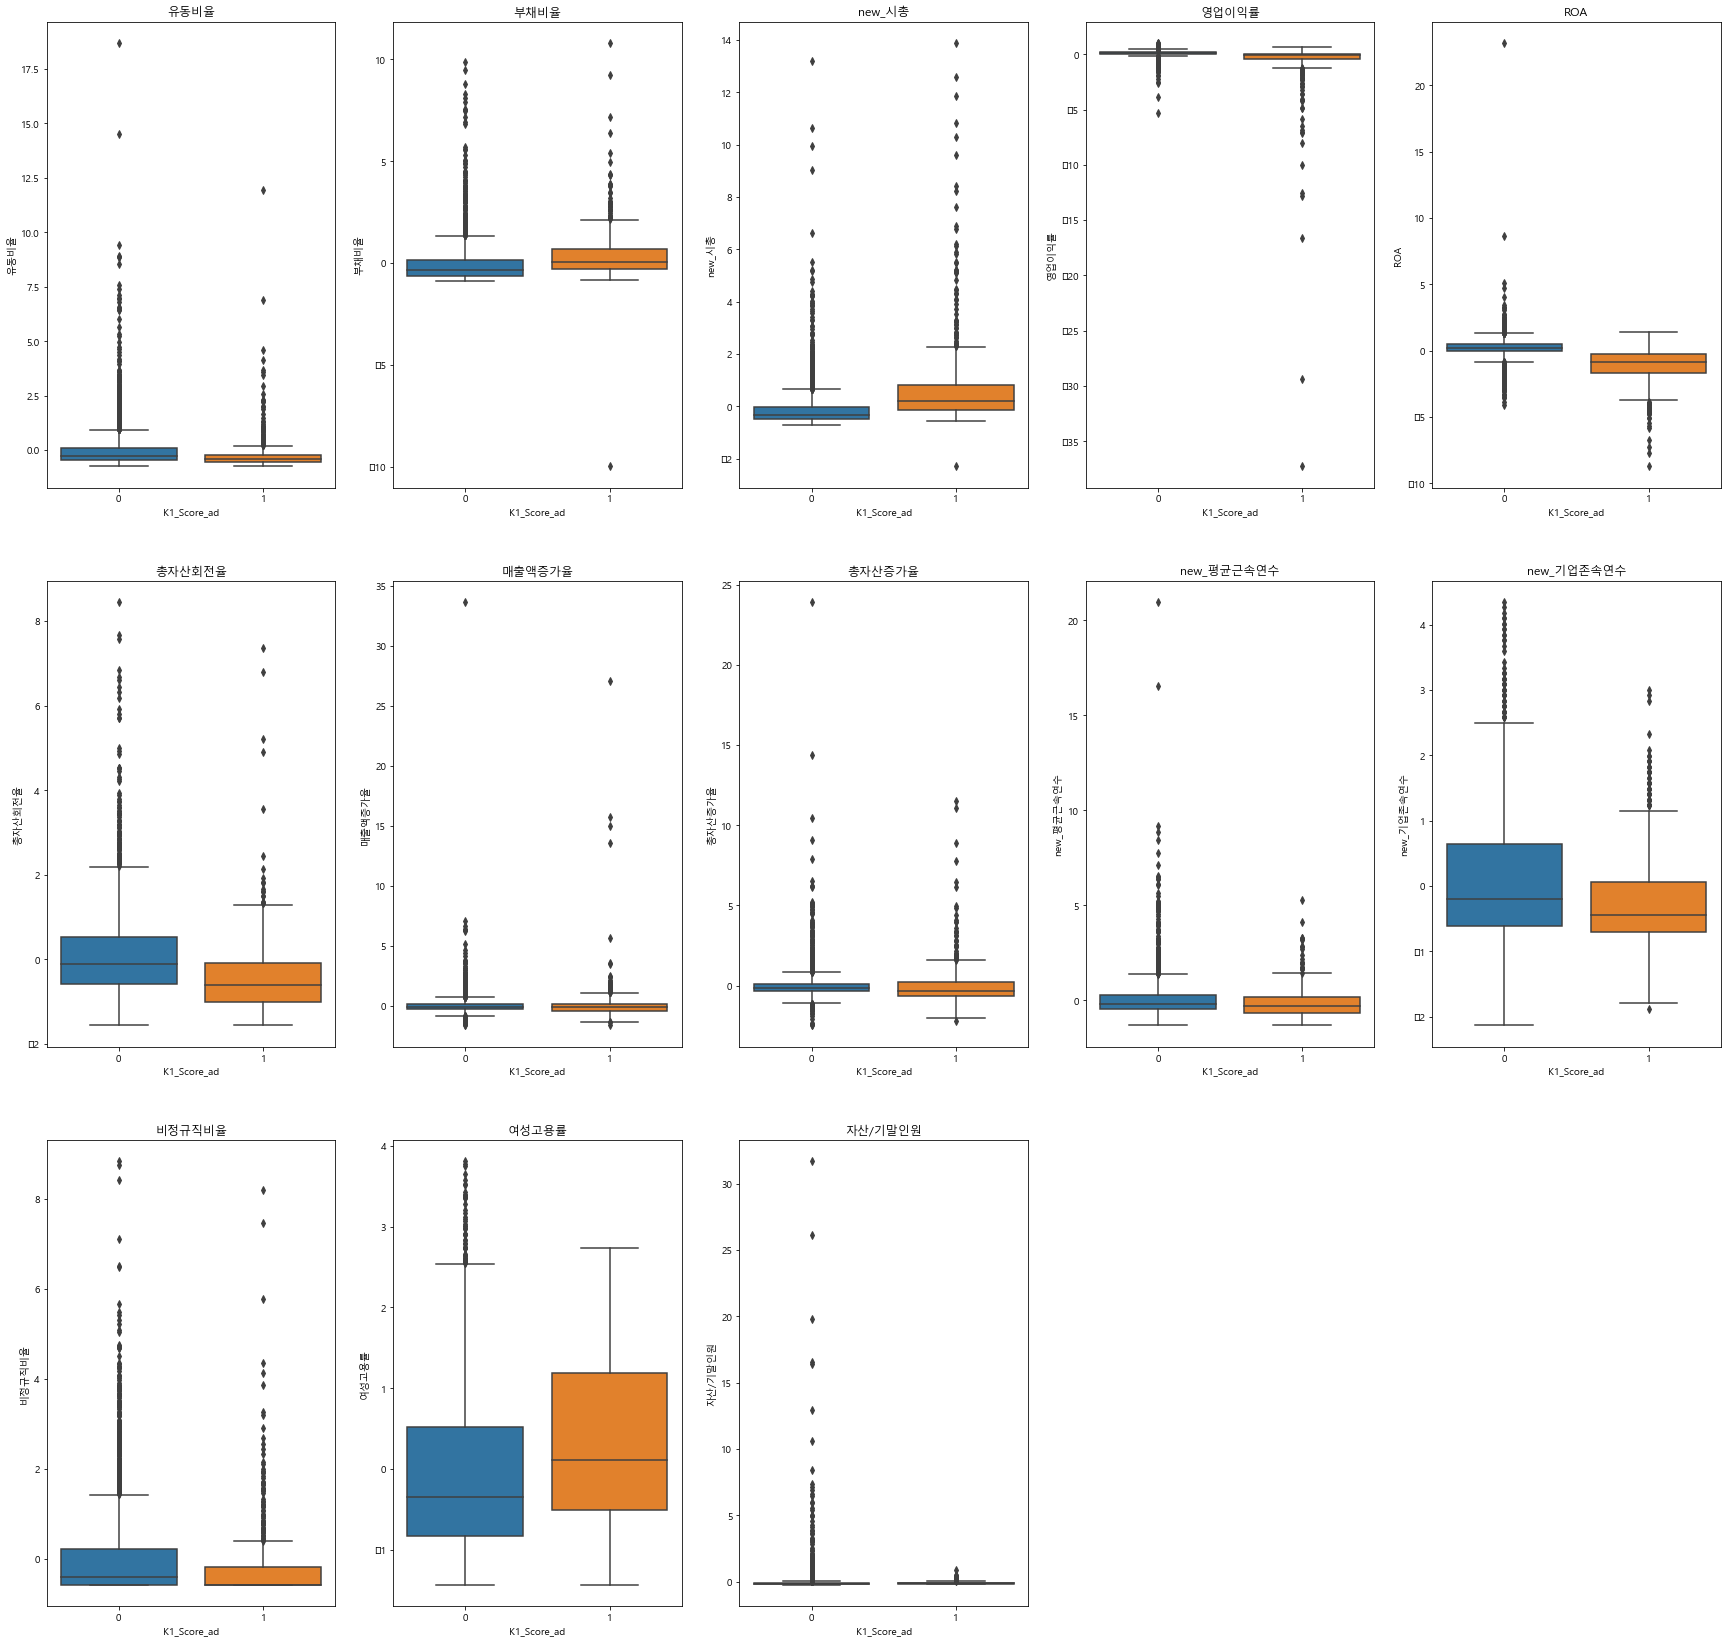

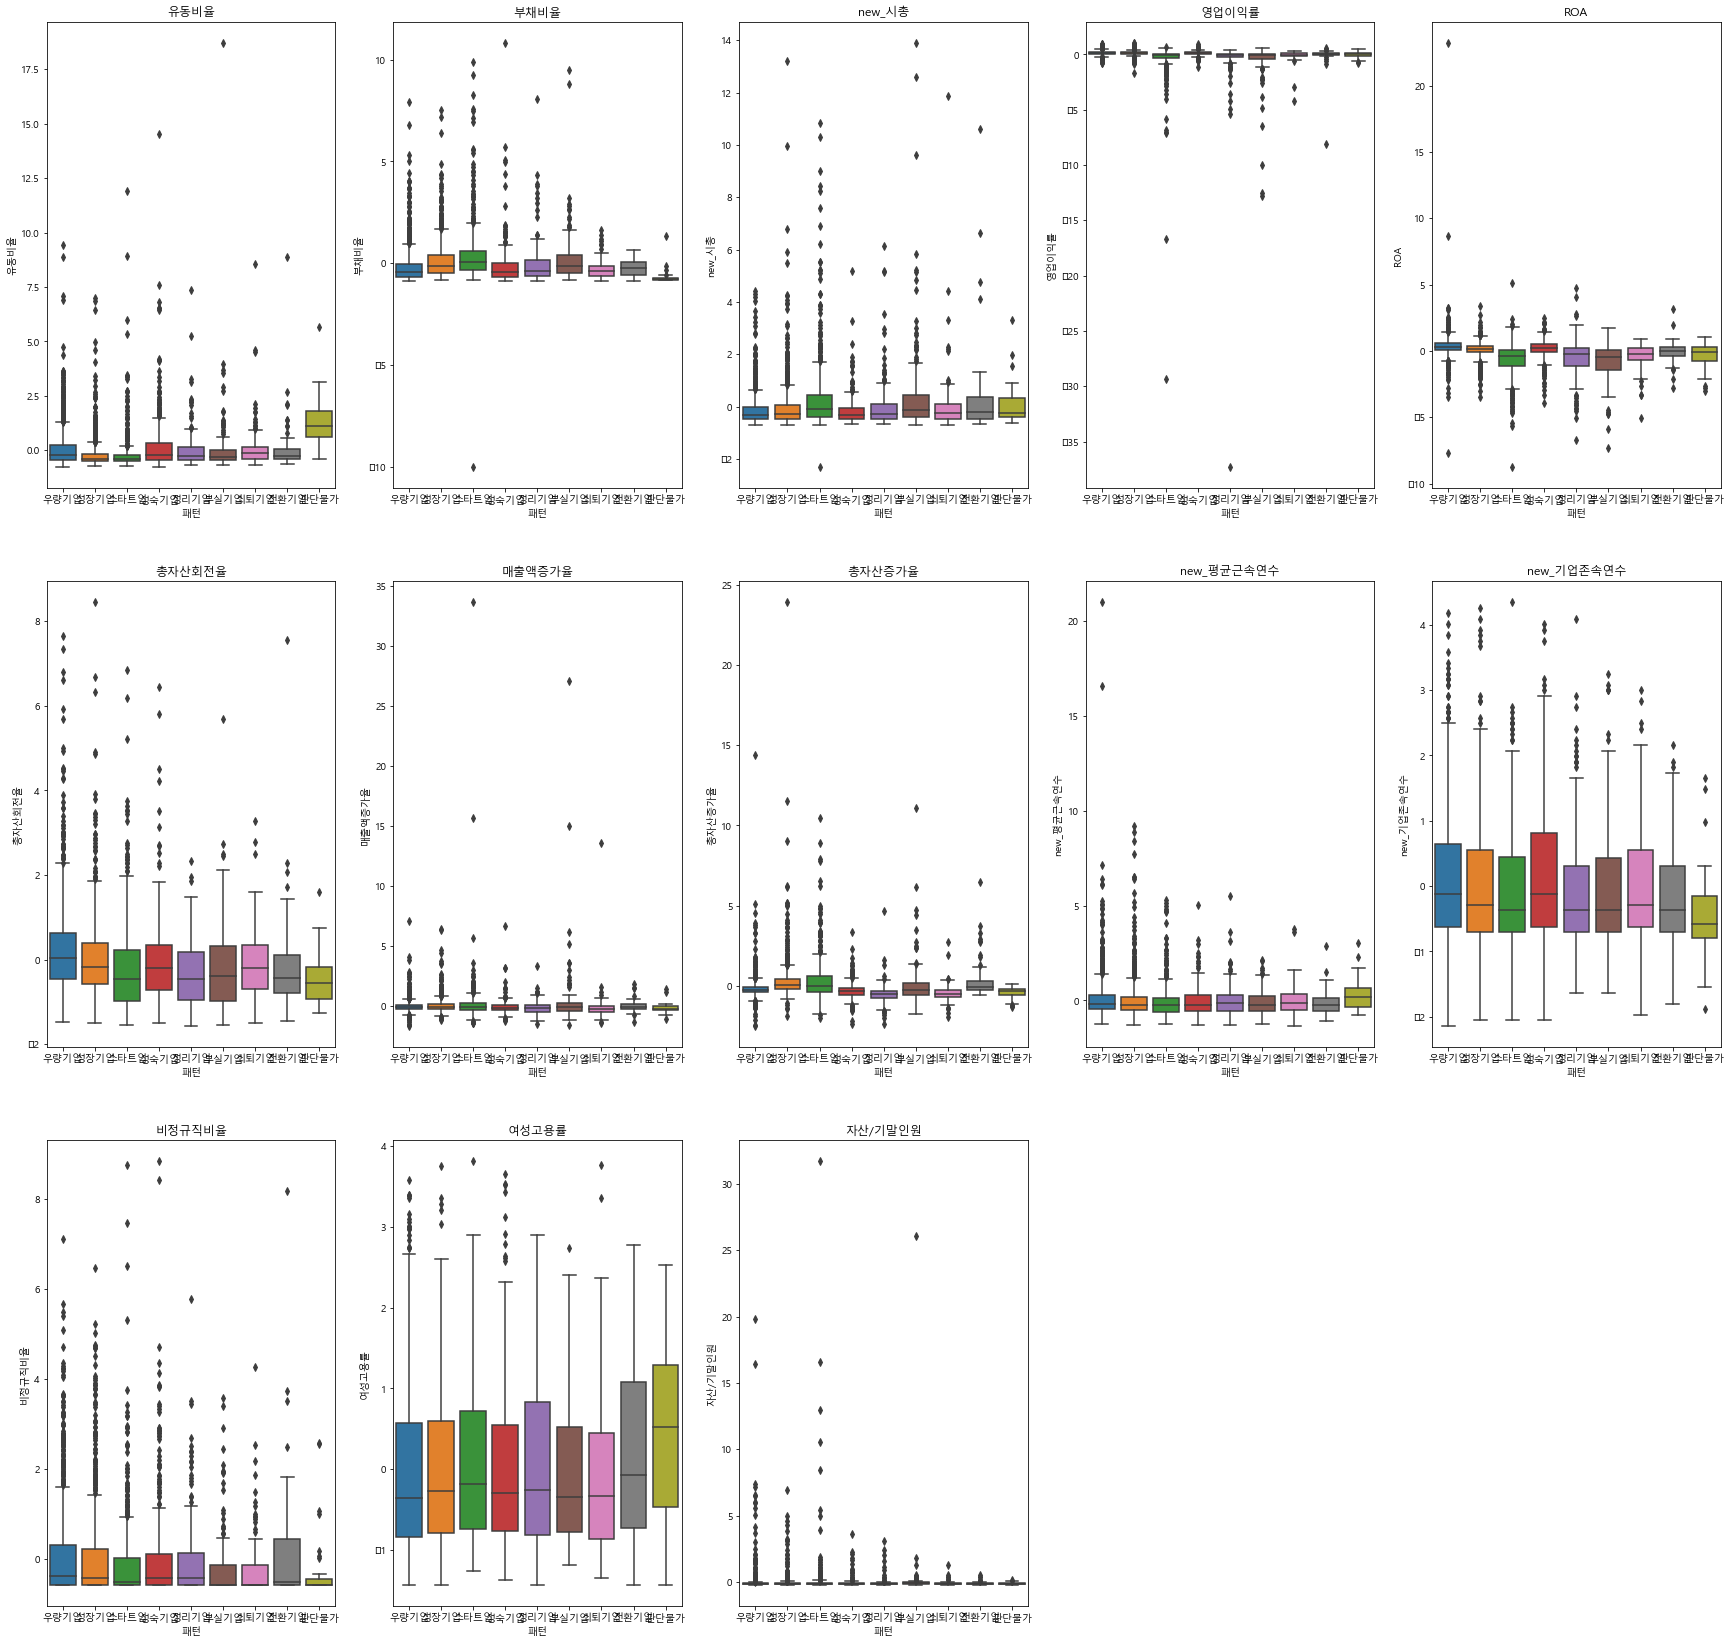

In [11]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.figure(figsize=(30,60))
for idx, col in enumerate(column_list):
    plt.subplot(6,5,idx+1)
    sns.boxplot(x="K1_Score_ad",y=x[col],data=data)
    plt.title(column_list[idx])
    plt.rcParams['font.family'] =  'Malgun Gothic'

plt.figure(figsize=(30,60))
for idx,col in enumerate(column_list):
    plt.subplot(6,5,idx+1)
    sns.boxplot(x="패턴",y=x[col],data=data)
    plt.title(column_list[idx])
    plt.rcParams['font.family'] =  'Malgun Gothic'

In [12]:
mydata=x
mydata.columns=column_list
mydata['회사명']=data['회사명']
mydata['회계년도']=data['회계년도']
mydata['거래소코드']=data['거래소코드']
mydata['K1_Score_ad']=data['K1_Score_ad']
mydata

,유동비율,부채비율,new_시총,영업이익률,ROA,총자산회전율,매출액증가율,총자산증가율,new_평균근속연수,new_기업존속연수,비정규직비율,여성고용률,자산/기말인원,회사명,회계년도,거래소코드,K1_Score_ad
0,0.668866,-0.698360,-0.109625,0.324228,0.751606,-0.200580,-0.032771,0.105053,-0.777090,4.010766,-0.191836,0.083767,-0.153952,삼천당제약(주),2017,250,0
1,0.194672,-0.615288,0.781484,0.203753,0.413337,-0.364494,-0.187306,-0.002355,-0.765490,4.094981,0.071765,0.128113,-0.145947,삼천당제약(주),2018,250,0
2,0.166564,-0.585623,0.571694,0.271778,0.507225,-0.303777,0.080135,-0.001213,-0.773593,4.179197,-0.330124,0.124392,-0.141137,삼천당제약(주),2019,250,0
3,1.057539,-0.652684,1.976848,0.090142,0.154007,-0.542933,-0.339181,-0.055886,-0.753458,4.263412,-0.424096,0.167136,-0.133936,삼천당제약(주),2020,250,0
4,0.045646,-0.514107,0.729008,-0.131596,-0.278430,-0.624580,-0.172497,-0.080111,-0.743414,4.347627,-0.451720,0.116207,-0.123901,삼천당제약(주),2021,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,-0.184940,-0.174493,0.106479,-0.383128,-0.829305,-1.031504,-0.319492,-0.793964,0.396038,-0.957935,-0.579684,0.927665,-0.051555,(주)엑세스바이오인코퍼레이션,2017,950130,0
3811,-0.311516,0.267376,0.249567,-0.162698,-0.577591,-0.772031,0.386711,-0.287477,0.260559,-0.873720,-0.579684,0.619735,-0.048897,(주)엑세스바이오인코퍼레이션,2018,950130,0
3812,-0.385478,0.570927,0.177165,-0.301217,-2.418884,-0.592320,-0.068422,-1.129506,0.007174,-0.789504,-0.579684,0.586625,-0.096521,(주)엑세스바이오인코퍼레이션,2019,950130,1
3813,-0.347411,0.054087,2.724781,1.035691,2.223698,0.331677,2.639192,3.991000,0.501259,-0.705289,-0.579684,0.782386,0.068864,(주)엑세스바이오인코퍼레이션,2020,950130,0


In [13]:
mydata_2017=mydata[mydata['회계년도']==2017]
mydata_2018=mydata[mydata['회계년도']==2018]
mydata_2019=mydata[mydata['회계년도']==2019]
mydata_2020=mydata[mydata['회계년도']==2020]
mydata_2021=mydata[mydata['회계년도']==2021]
mydata_2017_0=mydata_2017[mydata_2017['K1_Score_ad']==0]
mydata_2018_0=mydata_2018[mydata_2018['K1_Score_ad']==0]
mydata_2019_0=mydata_2019[mydata_2019['K1_Score_ad']==0]
mydata_2020_0=mydata_2020[mydata_2020['K1_Score_ad']==0]
mydata_2021_0=mydata_2021[mydata_2021['K1_Score_ad']==0]
mydata_2017_1=mydata_2017[mydata_2017['K1_Score_ad']==1]
mydata_2018_1=mydata_2018[mydata_2018['K1_Score_ad']==1]
mydata_2019_1=mydata_2019[mydata_2019['K1_Score_ad']==1]
mydata_2020_1=mydata_2020[mydata_2020['K1_Score_ad']==1]
mydata_2021_1=mydata_2021[mydata_2021['K1_Score_ad']==1]

In [14]:
df_0=pd.DataFrame()
a2017=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2017_0[column_list[i]])
    a=pd.Series(a)
    a2017.append(a)
a2017=pd.DataFrame(a2017)
df_0['2017']=a2017
a2018=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2018_0[column_list[i]])
    a=pd.Series(a)
    a2018.append(a)
a2018=pd.DataFrame(a2018)
df_0['2018']=a2018
a2018
a2019=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2019_0[column_list[i]])
    a=pd.Series(a)
    a2019.append(a)
a2019=pd.DataFrame(a2019)
df_0['2019']=a2019
a2019
a2020=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2020_0[column_list[i]])
    a=pd.Series(a)
    a2020.append(a)
a2020=pd.DataFrame(a2020)
df_0['2020']=a2020
a2020
a2021=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2021_0[column_list[i]])
    a=pd.Series(a)
    a2021.append(a)
a2021=pd.DataFrame(a2021)
df_0['2021']=a2021


df_1=pd.DataFrame()
b2017=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2017_1[column_list[i]])
    a=pd.Series(a)
    b2017.append(a)
b2017=pd.DataFrame(b2017)
df_1['2017']=b2017
b2018=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2018_1[column_list[i]])
    a=pd.Series(a)
    b2018.append(a)
b2018=pd.DataFrame(b2018)
df_1['2018']=b2018
b2018
b2019=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2019_1[column_list[i]])
    a=pd.Series(a)
    b2019.append(a)
b2019=pd.DataFrame(b2019)
df_1['2019']=b2019
b2019
b2020=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2020_1[column_list[i]])
    a=pd.Series(a)
    b2020.append(a)
b2020=pd.DataFrame(b2020)
df_1['2020']=b2020
b2020
b2021=[]
for i in range(len(column_list)):
    a=np.mean(mydata_2021_1[column_list[i]])
    a=pd.Series(a)
    b2021.append(a)
b2021=pd.DataFrame(b2021)
df_1['2021']=b2021

df_0.index=column_list
df_0=df_0.T
df_1.index=column_list
df_1=df_1.T

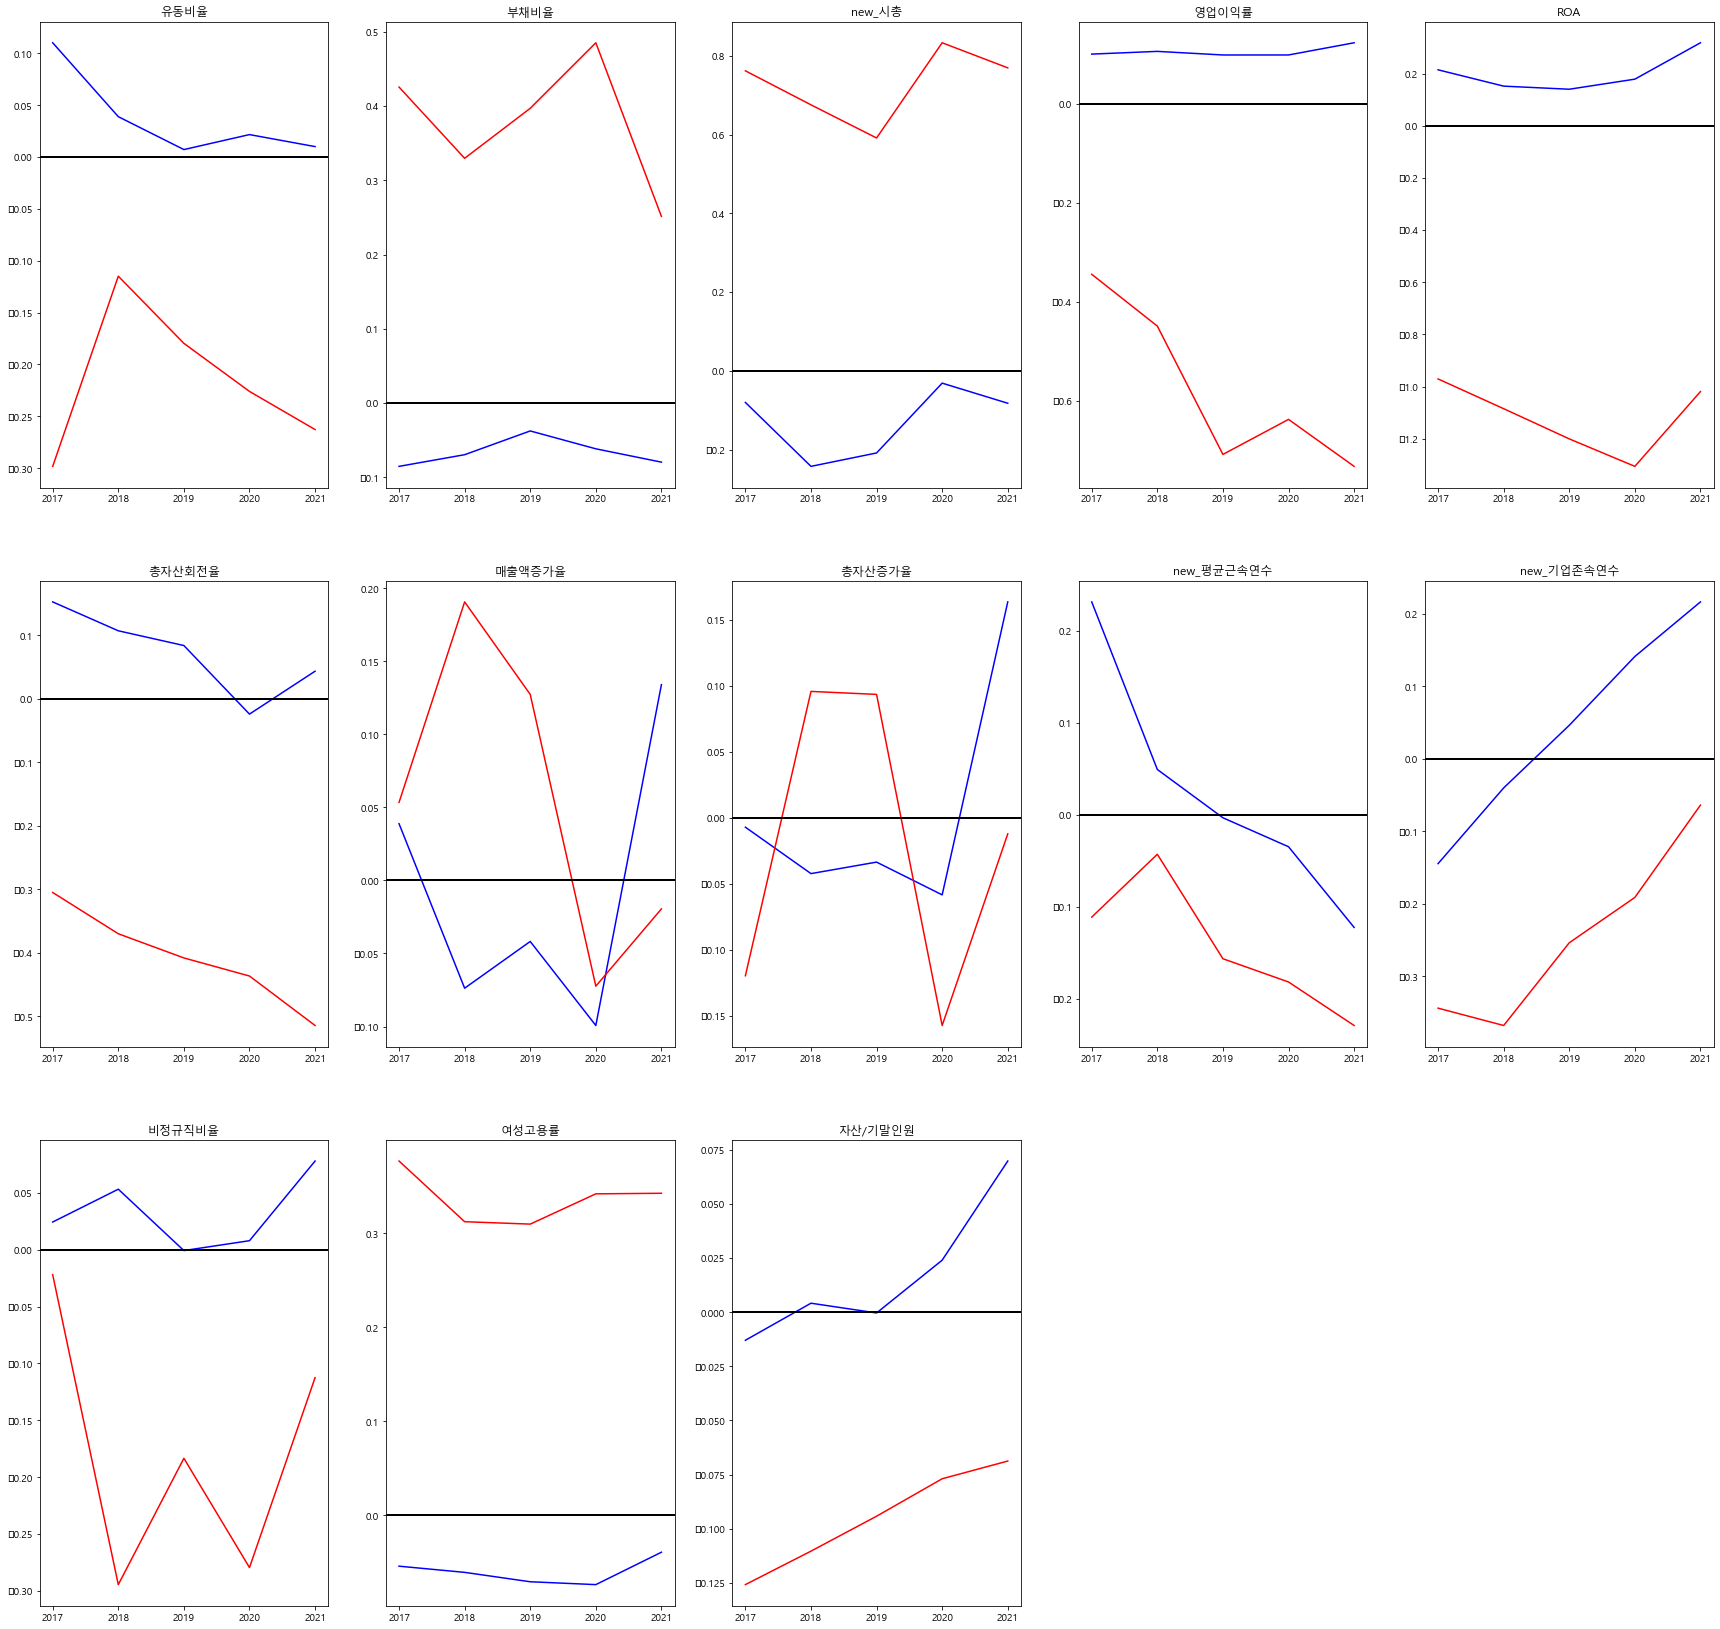

In [15]:
plt.figure(figsize=(30,60))   
warnings.filterwarnings('ignore')
for idx,col in enumerate(column_list):
    plt.subplot(6,5,idx+1)
    plt.plot(df_0[column_list[idx]],'b')
    plt.plot(df_1[column_list[idx]],'r')
    plt.title(column_list[idx])
    plt.title(column_list[idx])
    plt.axhline(0, color='black', linestyle='solid', linewidth=2)
    plt.rcParams['font.family'] =  'Malgun Gothic'

In [16]:
import random
random.seed(0)
a = []
ran_num = random.randint(0,631)
for i in range(131):
    while ran_num in a:
        ran_num = random.randint(0,631)
    a.append(ran_num)
a.sort()
hh=mydata['회사명'].unique()
my_0=mydata[(mydata['회계년도']==2021) & (mydata['K1_Score_ad']==0)]
my_1=mydata[(mydata['회계년도']==2021) & (mydata['K1_Score_ad']==1)]
hh_0=my_0['회사명'].unique()
hh_1=my_1['회사명'].unique()
myhh=[]
print(a)
for i in range(len(a)):
    myhh.append(hh_0[a[i]])
my_0=mydata[mydata['회사명'].isin(my_0['회사명'])]
my_1=mydata[mydata['회사명'].isin(my_1['회사명'])]
myhh_0=mydata[mydata['회사명'].isin(myhh)]
print(my_0.shape)
print(my_1.shape)
print(myhh_0.shape)

[1, 14, 16, 22, 27, 33, 37, 39, 41, 46, 63, 64, 70, 75, 82, 84, 91, 93, 95, 97, 101, 103, 111, 118, 119, 122, 126, 127, 133, 142, 143, 145, 149, 150, 153, 174, 188, 189, 191, 193, 194, 195, 199, 208, 209, 220, 223, 224, 225, 227, 241, 244, 247, 248, 249, 256, 265, 266, 277, 281, 282, 288, 294, 297, 298, 308, 310, 317, 323, 324, 327, 332, 333, 338, 340, 341, 343, 362, 365, 366, 379, 380, 394, 400, 408, 414, 429, 430, 436, 444, 453, 455, 458, 461, 483, 487, 488, 497, 498, 501, 504, 505, 516, 520, 523, 533, 534, 537, 545, 547, 553, 556, 560, 561, 564, 565, 573, 581, 587, 589, 593, 597, 601, 603, 610, 616, 617, 620, 625, 626, 627]
(3160, 17)
(655, 17)
(655, 17)


13it [00:07,  1.79it/s]


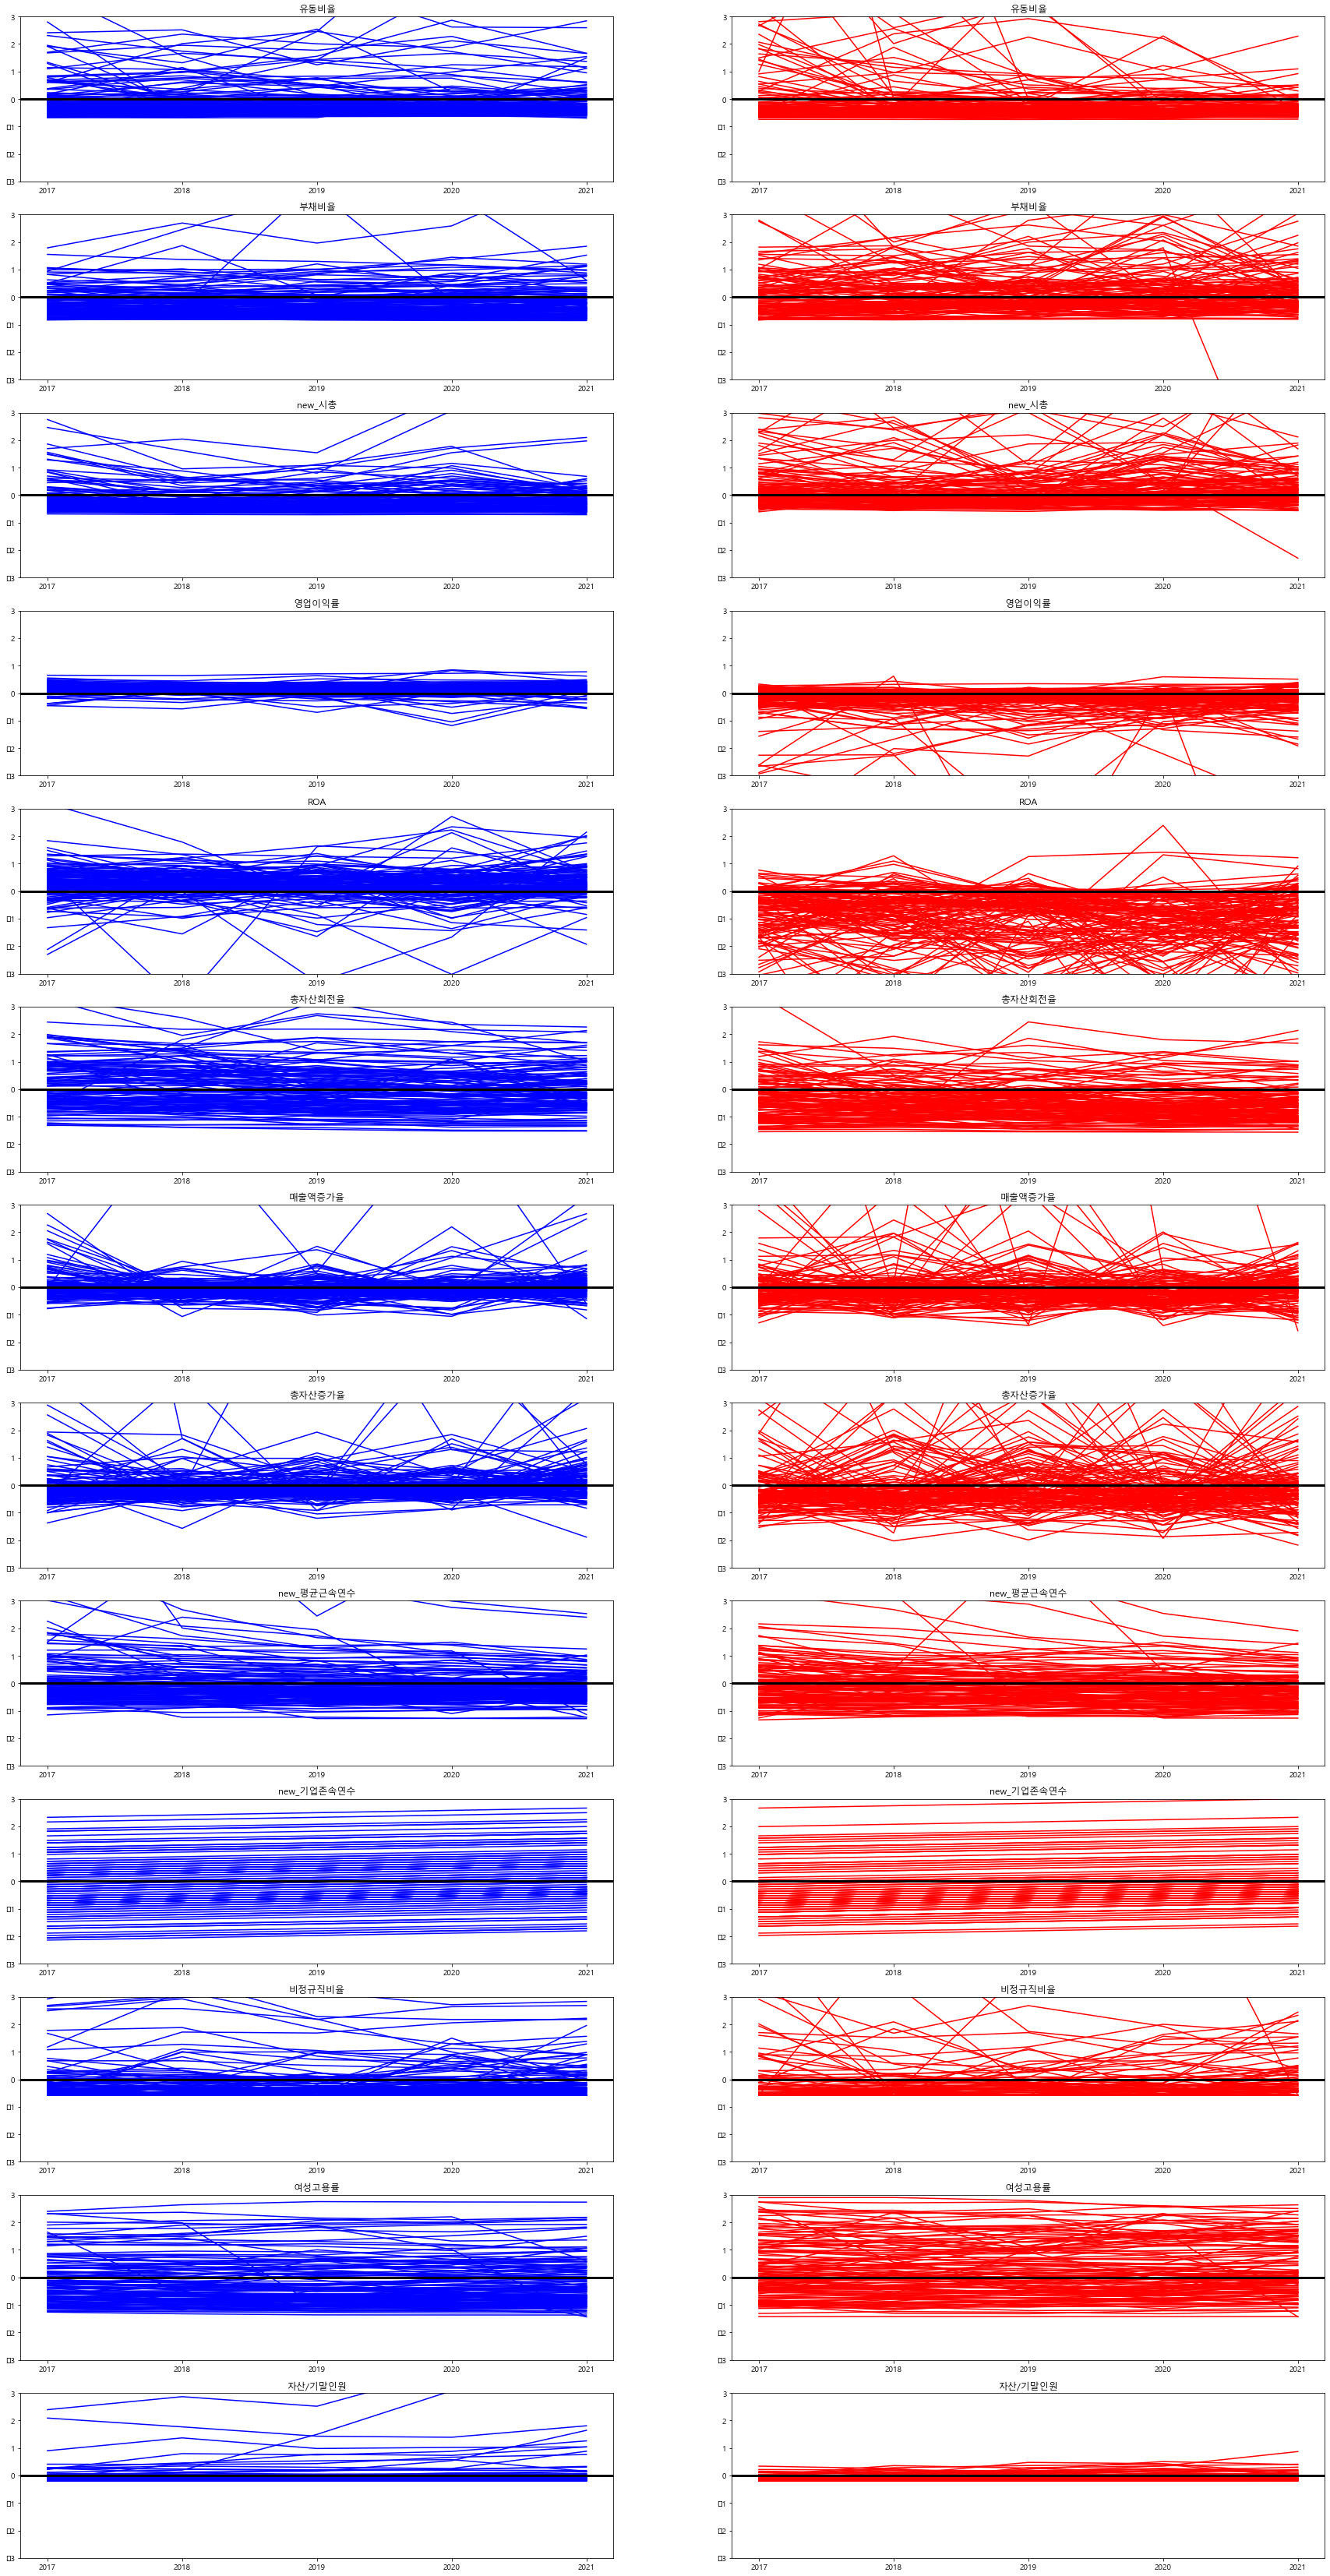

In [17]:
from tqdm import tqdm
plt.figure(figsize=(30,60))
for idx,col in tqdm(enumerate(column_list)):
    plt.subplot(13,2,2*(idx+1)-1)
    for i in range(len(myhh)):
        myk_0=my_0[my_0['회사명']==myhh[i]]
        years_0=myk_0['회계년도'].astype(str)
        plt.title(column_list[idx])
        plt.plot(years_0,myk_0[column_list[idx]],'b')
        plt.ylim(-3,3)
        plt.rcParams['font.family'] =  'Malgun Gothic'
        plt.axhline(0, color='black', linestyle='solid', linewidth=3)
    plt.subplot(13,2,2*(idx+1))
    for k in range(len(hh_1)):
        myk_1=my_1[my_1['회사명']==hh_1[k]]
        years_1=myk_1['회계년도'].astype(str)
        plt.title(column_list[idx])
        plt.plot(years_1,myk_1[column_list[idx]],'r')
        plt.ylim(-3,3)
        plt.rcParams['font.family'] =  'Malgun Gothic'
        plt.axhline(0, color='black', linestyle='solid', linewidth=3)

In [20]:
data1[column_list]=x[column_list]
quest18_1=data1['회사명'].isin(mydata_2018_1['회사명'][mydata_2018_1['총자산증가율']>2])
quest19_1=data1['회사명'].isin(mydata_2019_1['회사명'][mydata_2019_1['총자산증가율']>2])
quest18_1=data1[quest18_1]
quest19_1=data1[quest19_1]
a=quest18_1['회사명'].unique()
a.sort()
a=pd.DataFrame(a)
b=quest19_1['회사명'].unique()
b.sort()
b=pd.DataFrame(b)
mydf=pd.merge(a,b,how='outer')
# mydf=pd.Series(mydf)

In [22]:
pd.set_option('display.max_rows', None) # 모든행출력
pd.set_option('display.max_columns', None) # 모든열출력
data1819=data1[data1['회사명'].isin(mydf[0])]
# data1819=data1819[(data1819['회계년도']==2018)|(data1819['회계년도']==2019)]'
data1819[['회사명','회계년도','차입금의존도','부채비율','매출액증가율','총자산증가율','부채','자본','자산','장기차입금','단기차입금','사채','K1_Score_ad']]

,회사명,회계년도,차입금의존도,부채비율,매출액증가율,총자산증가율,부채,자본,자산,장기차입금,단기차입금,사채,K1_Score_ad
610,(주)광무,2017,2.921994,0.220804,-0.461111,-0.348921,15398329,13552175,28950503,0,845932,0,부실
611,(주)광무,2018,19.836979,0.716197,-0.066660,-0.388349,17702532,10729216,28431748,0,4570000,1070000,부실
612,(주)광무,2019,9.183240,0.826137,0.718411,3.330873,40295715,22844122,63139837,0,5798283,0,부실
613,(주)광무,2020,15.361190,-0.301477,-0.653522,-1.500334,14403170,24221981,38625151,0,5398283,535000,부실
614,(주)광무,2021,4.784979,0.129626,-0.558893,4.750928,53084091,50960246,104044336,578500,4400000,0,건전
1180,(주)상지카일룸,2017,4.799445,-0.383186,1.790443,2.548512,13658940,26787407,40446347,0,1941200,0,부실
1181,(주)상지카일룸,2018,39.191759,0.924856,1.833799,6.138099,83106261,44529668,127635929,0,50022766,0,부실
1182,(주)상지카일룸,2019,16.860190,1.475272,3.492412,0.294416,109458452,44913755,154372206,0,26027447,0,판정보류
1183,(주)상지카일룸,2020,29.556558,1.081210,-1.394865,0.267394,124126763,61192970,185319733,0,54774134,0,부실
1184,(주)상지카일룸,2021,33.858414,0.425608,-0.143455,-1.154928,77338625,57347219,134685844,33500000,12102491,0,부실


In [83]:
pd.set_option('display.max_rows',10) # 모든행출력
pd.set_option('display.max_columns', 10) # 모든열출력

In [20]:
data.columns

Index(['회사명', '거래소코드', '회계년도', '자산', '부채', '자본', '매출액', '매출원가', '매출총이익',
       '영업이익', '당기순이익', '유동자산', '당좌자산', '재고자산', '유동부채', '매출채권', '매입채무',
       '단기차입금', '장기차입금', '사채', '유형자산', '이익잉여금', '이자비용', '영업활동으로 인한 현금흐름',
       '투자활동으로 인한 현금흐름', '재무활동으로 인한 현금흐름', '이자수익', '법인세비용', '지분법이익', '지분법손실',
       '복리후생비', '교육훈련비', '경상개발비', '기부금', '시총', '기말인원', '평균근속연수', '유동비율',
       '당좌비율', '부채비율', '차입금의존도', '이자보상배율(역수)', '매출총이익률', '영업이익률', '당기순이익률',
       'ROA', 'ROE', '재고자산회전율', '매출채권회전율', '총자산회전율', '매입채무회전율', '현금순환주기',
       '매출액증가율', '영업이익증가율', '유형자산증가율', '총자산증가율', '교육훈련비/영업이익', '경상개발비/영업이익',
       '복리후생비/영업이익', '기부금/영업이익', '비정규직비율', '여성고용률', '공공조달은1', 'new_시총',
       'new_평균근속연수', 'new_기업존속연수', 'new_상장년수', '자산/기말인원', '산업', '제품', '설립일',
       '상장일', '기업존속연수', '상장년수', '지역', 'Z-Score', 'Z-Score_ad', 'K1_Score',
       'K1_Score_ad', '종합 and', '종합 or', '패턴'],
      dtype='object')

In [21]:
b

,0
0,(주)광무
1,(주)시티랩스
2,(주)엔케이맥스
3,(주)한국테크놀로지
4,다믈멀티미디어(주)


In [22]:
mydf

,0
0,(주)비보존헬스케어
1,(주)비엘
2,(주)상지카일룸
3,(주)에스티큐브
4,(주)코데즈컴바인
...,...
7,(주)광무
8,(주)시티랩스
9,(주)엔케이맥스
10,(주)한국테크놀로지


In [23]:
data.columns

Index(['회사명', '거래소코드', '회계년도', '자산', '부채', '자본', '매출액', '매출원가', '매출총이익',
       '영업이익', '당기순이익', '유동자산', '당좌자산', '재고자산', '유동부채', '매출채권', '매입채무',
       '단기차입금', '장기차입금', '사채', '유형자산', '이익잉여금', '이자비용', '영업활동으로 인한 현금흐름',
       '투자활동으로 인한 현금흐름', '재무활동으로 인한 현금흐름', '이자수익', '법인세비용', '지분법이익', '지분법손실',
       '복리후생비', '교육훈련비', '경상개발비', '기부금', '시총', '기말인원', '평균근속연수', '유동비율',
       '당좌비율', '부채비율', '차입금의존도', '이자보상배율(역수)', '매출총이익률', '영업이익률', '당기순이익률',
       'ROA', 'ROE', '재고자산회전율', '매출채권회전율', '총자산회전율', '매입채무회전율', '현금순환주기',
       '매출액증가율', '영업이익증가율', '유형자산증가율', '총자산증가율', '교육훈련비/영업이익', '경상개발비/영업이익',
       '복리후생비/영업이익', '기부금/영업이익', '비정규직비율', '여성고용률', '공공조달은1', 'new_시총',
       'new_평균근속연수', 'new_기업존속연수', 'new_상장년수', '자산/기말인원', '산업', '제품', '설립일',
       '상장일', '기업존속연수', '상장년수', '지역', 'Z-Score', 'Z-Score_ad', 'K1_Score',
       'K1_Score_ad', '종합 and', '종합 or', '패턴'],
      dtype='object')

In [24]:
data.isnull().sum()

회사명            0
거래소코드          0
회계년도           0
자산             0
부채             0
              ..
K1_Score       0
K1_Score_ad    0
종합 and         0
종합 or          0
패턴             0
Length: 82, dtype: int64

In [25]:
cond=data['재고자산']==0
cond=cond[cond==True]
cond.index
data=data.drop(cond.index,axis=0)
data.shape

(3815, 82)